In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Given data
data = [
    (15.5, 40, 0),
    (23.75, 23.25, 0),
    (8, 17, 1),
    (17, 21, 0),
    (5.5, 10, 1),
    (19, 12, 1),
    (24, 20, 0),
    (2.5, 12, 1),
    (7.5, 15, 1),
    (11, 26, 0)
]
# pass = 1 ; fail = 0

In [11]:
# Extract features and labels from the data
features = np.array([(age, temp) for age, temp, _ in data])
labels = np.array([label for _, _, label in data])
print(features)
print(labels)

[[15.5  40.  ]
 [23.75 23.25]
 [ 8.   17.  ]
 [17.   21.  ]
 [ 5.5  10.  ]
 [19.   12.  ]
 [24.   20.  ]
 [ 2.5  12.  ]
 [ 7.5  15.  ]
 [11.   26.  ]]
[0 0 1 0 1 1 0 1 1 0]


In [12]:
# Create kNN model with k = 5
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(features, labels);

In [13]:
def plot_decision_boundary(model, X, y, n_neighbors):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
    h = .02  # Step size in the mesh

    # Creating a meshgrid 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the class labels for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape the result to create a grid of predictions
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"kNN Decision Boundary (k={n_neighbors})")
    plt.xlabel('propellant age (weeks)')
    plt.ylabel('propellant temperature ()')
    plt.show()

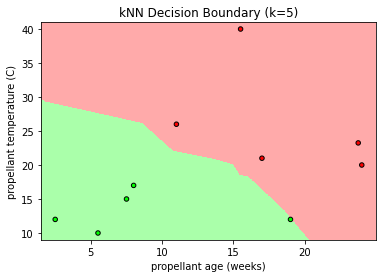

In [14]:
# Plotting decision boundary
plot_decision_boundary(knn_model,features, labels, n_neighbors=5)

# leave one out cross-validation (LOOCV)

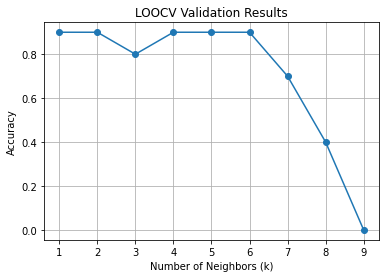

Optimum value of k: 1


In [17]:
from sklearn.metrics import accuracy_score

# Convert data into numpy array
data = np.array(data)

# Extract features and labels
features = data[:, :2]
labels = data[:, 2]

# Perform LOOCV
n_samples = len(features)
k_values = range(1, n_samples)  # Trying k values from 1 to n-1
accuracies = []

for k in k_values:
    loocv_accuracy = 0.0  # Initialize as float

    for i in range(n_samples):
        leave_one_out_features = np.delete(features, i, axis=0)
        leave_one_out_labels = np.delete(labels, i)

        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(leave_one_out_features, leave_one_out_labels)

        prediction = knn_model.predict(features[i].reshape(1, -1))  # Reshape for prediction
        loocv_accuracy += (prediction == labels[i])

    loocv_accuracy /= float(n_samples)  # Convert to float
    accuracies.append(loocv_accuracy)

# Plot validation results
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('LOOCV Validation Results')
plt.xticks(k_values)
plt.grid()
plt.show()

# Find the optimum value of k with the highest accuracy
optimal_k = k_values[np.argmax(accuracies)]
print(f'Optimum value of k: {optimal_k}')

The determination of the optimal value of k in the Leave-One-Out Cross-Validation (LOOCV) test is a crucial step in effectively applying the k-Nearest Neighbors (kNN) algorithm. In LOOCV, each data point is successively treated as a validation sample while the remaining points form the training set. The chosen k value influences the balance between model complexity and bias. For very small k values, the algorithm might be overly sensitive to noise, leading to an erratic decision boundary that captures noise instead of underlying patterns. Conversely, when k is very large, the boundary can become too smooth, potentially overlooking important local structures in the data. The optimum k is the one that yields the highest accuracy on the validation set while avoiding both overfitting and underfitting. The kNN algorithm is prone to overfitting with smaller k values, causing it to conform too closely to the training data. As k increases, the algorithm generalizes better to new data, reducing overfitting but possibly leading to increased bias. Thus, the selection of an appropriate k value is a trade-off that necessitates a careful consideration of model complexity and bias, balancing the ability to capture patterns in the data with the ability to avoid noise.